1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

$$Tl^{208}\to Pb^{208}\qquad t_{1/2}=183.12 s \to \tau = \frac{t_{1/2}}{\ln 2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

0.6931471805599453


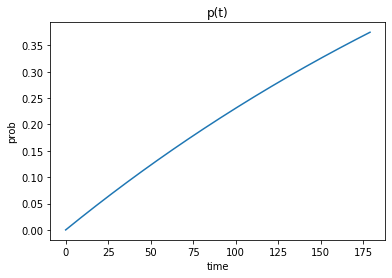

In [2]:
max_t = 180
emivita = 3.052 * 60 

print(math.log(2))
tau = emivita / math.log(2)
time = np.arange(0,max_t,1)
pt = 1 - 2**(- time/(tau))

plt.plot(time,pt)
plt.title('p(t)')
plt.xlabel('time')
plt.ylabel('prob')
plt.show()
#print(pt)

In [3]:
# For each second, we can generate a uniform float from 0 to 1, if this number is greater than p(t_i) then the
# atom won't decay

totalatoms = 1000
tallio = np.array([totalatoms+1])
piombo = np.array([0])

for t in time:
    num_decay = 0
    for _ in range(1,tallio[t]):
        prob = random.uniform(0, 1)
        #print(prob, pt[t])
        if prob < pt[t]:
            num_decay += 1
    tallio = np.append(tallio, tallio[t] - num_decay)
    piombo = np.append(piombo, piombo[t] + num_decay)

#print(piombo)
piombo = piombo[1:]
tallio = tallio[1:]

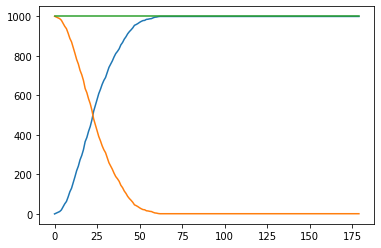

In [4]:
plt.plot(time,piombo)
plt.plot(time,tallio)
plt.plot(time,piombo+tallio)

To use the inverse method we must first find the pdf:
Let z be distributed uniformly:

$$z =\int_{0}^{z} dz' = \int_{-\infty}^{x(z)} p(x')dx'=\int_{0}^{x(z)}2^{-\frac{t}{\tau}}\frac{\ln(2)}{\tau}dt$$

Solving analitically the integral I found

$$z=\left(1-2^\left[-x(z)/\tau\right]\right)\Rightarrow x(z)=-\tau\left(\log_2\left(1-z\right)\right)$$

In [5]:
def inv_transf(unif):
    return - tau * np.log2(1-unif)

In [6]:
unif = np.random.rand(1000)
nonunif = inv_transf(unif)

(array([2.18556680e-03, 1.33428250e-03, 9.11659081e-04, 4.95073143e-04,
        3.44136209e-04, 2.35461617e-04, 1.81124321e-04, 9.65996377e-05,
        6.64122509e-05, 3.01873868e-05, 6.03747735e-05, 4.22623415e-05,
        2.41499094e-05, 0.00000000e+00, 1.20749547e-05, 0.00000000e+00,
        6.03747735e-06, 6.03747735e-06, 0.00000000e+00, 6.03747735e-06]),
 array([2.90450176e-01, 1.65922541e+02, 3.31554633e+02, 4.97186724e+02,
        6.62818815e+02, 8.28450906e+02, 9.94082998e+02, 1.15971509e+03,
        1.32534718e+03, 1.49097927e+03, 1.65661136e+03, 1.82224345e+03,
        1.98787555e+03, 2.15350764e+03, 2.31913973e+03, 2.48477182e+03,
        2.65040391e+03, 2.81603600e+03, 2.98166809e+03, 3.14730018e+03,
        3.31293227e+03]),
 <a list of 1 Patch objects>)

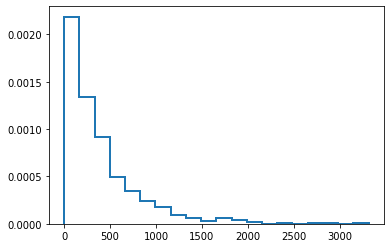

In [7]:
plt.hist(nonunif, histtype='step', bins=20, density=True, linewidth=2)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [8]:
# The only thing that differs from a particle to another is b, 
# I guess the distribution of the particles are so that the mean is b = 0

# Let's first initialize all constants:
const = ( 79*5.29*(1.602176634*1.602176634) )/(2*math.pi*8.85418781762*7.7*1.602*1000) #in unit of a0

# tan(0.5theta)=const/b => theta = 2*arctan(const/b)

In [9]:
sigma = 1/100 #working in a0 unit
# now we have to generate 1,000,000 normally distributed values
x = np.random.normal(0, sigma, 1000000)
y = np.random.normal(0, sigma, 1000000)

In [10]:
def bfromxy(x,y):
    return np.sqrt(x**2 + y**2)

def thetafromb(b):
    return 2*np.arctan(const/b)

In [11]:
# b should be in unit of a0
b = bfromxy(x,y)
theta = thetafromb(b)

(array([2.21765786e+00, 2.33414908e+00, 9.19099206e-01, 4.19344956e-01,
        2.17885350e-01, 1.29041742e-01, 8.01943659e-02, 5.39535554e-02,
        3.75799148e-02, 2.71526282e-02, 1.94738207e-02, 1.57353682e-02,
        1.20685584e-02, 9.25494956e-03, 6.84514566e-03, 5.43834123e-03,
        3.62773181e-03, 2.56611550e-03, 1.40680444e-03, 5.08012713e-04]),
 array([0.05872646, 0.21226592, 0.36580539, 0.51934485, 0.67288431,
        0.82642378, 0.97996324, 1.13350271, 1.28704217, 1.44058164,
        1.5941211 , 1.74766057, 1.90120003, 2.0547395 , 2.20827896,
        2.36181842, 2.51535789, 2.66889735, 2.82243682, 2.97597628,
        3.12951575]),
 <a list of 1 Patch objects>)

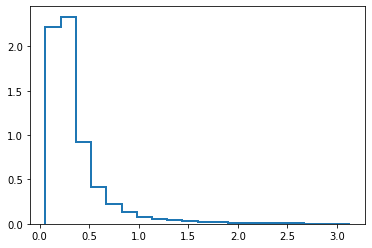

In [12]:
plt.hist(theta, histtype='step', bins=20, density=True, linewidth=2)

In [20]:
backscattering = theta[theta > np.pi/2]
print(backscattering)
print(backscattering.size/theta.size)
print(backscattering.size)

[1.97247981 1.74524684 2.215555   ... 1.83625437 2.6458854  3.0256428 ]
0.012369
12369


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

1.45062
Monte carlo error: 0.0007800000000000029
Mean value error: 0.00346731378162346


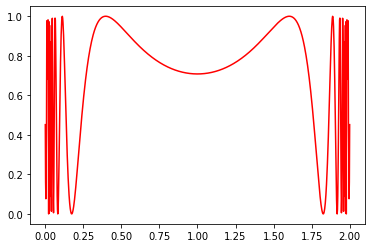

In [14]:
truearea = 1.4514

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print(I)

print("Monte carlo error:", abs(truearea-I))


# Mean value integration
unif = np.random.rand(1000)*2
meanintarray = f(unif)
Imean = 2*np.mean(meanintarray)
print("Mean value error:", abs(truearea-Imean))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [23]:
def f(x):
    return np.sqrt(1-x**2)

circlex = np.random.rand(10000)

r = f(circlex)
#print(x)
truearea = np.pi/4

meanvaluearea = np.mean(r)

print(truearea,meanvaluearea)

0.7853981633974483 0.7851986733182441


In [25]:
def f(x,y):
    r = x**2 + y**2
    return np.array(r < 1).astype(int)


circlex = np.random.rand(10000)*2-1
circley = np.random.rand(10000)*2-1

truearea = np.pi
meanvaluearea = 4*np.mean(f(circlex,circley))
print(meanvaluearea)

3.1284


In [30]:
#Volume of a 10D sphere: pi^5 / 120 * r^10
#for a unitary 10D sphere:
truevolume = (np.pi**5)/120
print("True volume:", truevolume)

tendvalues = np.random.rand(10,10000000)*2-1 # using more points because the output now varies a lot
#print(tendvalues)
def f(tendvalues):
    r = tendvalues**2
    r = np.sum(r,axis=0)
    return np.array(r <= 1).astype(int)



meanvaluearea = 1024*np.mean(f(tendvalues))

print("Approximated:",meanvaluearea)

print("\n\nError:", abs(meanvaluearea-truevolume))

True volume: 2.550164039877345
Approximated: 2.5767936


Error: 0.026629560122654716


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$


0.7593784508770781


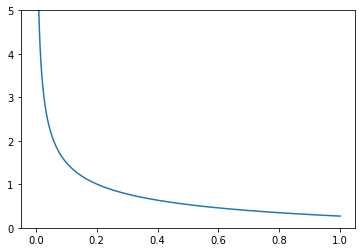

In [56]:
# The integral can be solved analitically and it is 2
# I = 2/N*sum(f(xi)/w(xi))

def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

impsampx = np.random.rand(10000)

#PLOTTING
plotfx = np.sort(impsampx)
plotfy = f(plotfx)
plt.ylim((0,5))
plt.plot(plotfx,plotfy)

impsampf = f(impsampx)
impsampw = np.divide(1,np.sqrt(impsampx))
temp = np.divide(impsampf,impsampw)
I = 2*np.mean(temp) # 2 is the value of the integral

print(I)